In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize

In [19]:
df_levelups = pd.read_csv('levelups_panel_20240719neww.csv',encoding='utf-8')
df_focal = pd.read_csv('focal_data_filled_final.csv',encoding='utf-8')

KeyboardInterrupt: 

In [ ]:
df_focal=df_focal[['player_slug','level_to','interval']]

In [ ]:
df_levelups.update(df_levelups.set_index(['player_slug', 'level_to'])
                   .combine_first(df_focal.set_index(['player_slug', 'level_to']))
                   .reset_index())


In [ ]:
df_levelups.to_csv("levelups_panel_20240722.csv",index=False,encoding='utf-8')

## Functional Clustering

In [ ]:
from skfda import FDataGrid
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.representation.basis import FourierBasis
from skfda.exploratory.visualization import FPCAPlot
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from joblib import Parallel, delayed
from tqdm import tqdm

In [ ]:
data = pd.read_csv('levelups_panel_20240722.csv',encoding='utf-8')

In [ ]:
focal_data=data[['level_to','player_slug','total_purchase','total_ad','interval','highest_level','binge','first_session_level',
                 'ad_item','ad_revival','purchase','playtime_boss','playtime_dungeon','playtime_tower','playtime_pvp',
                 'playtime_farm','playtime_survival']]

In [ ]:
time_points = sorted(focal_data['level_to'].unique())
player_slugs = focal_data['player_slug'].unique()
value_columns=['interval','highest_level','binge','first_session_level',
                 'ad_item','ad_revival','purchase','playtime_boss','playtime_dungeon','playtime_tower','playtime_pvp',
                 'playtime_farm','playtime_survival']

In [ ]:
# value_columns를 사용하여 데이터 매트릭스 생성
data_matrices = {col: np.zeros((len(player_slugs), len(time_points))) for col in value_columns}

for i, slug in tqdm(enumerate(player_slugs), total=len(player_slugs), desc="Processing players"):
    player_data = data[data['player_slug'] == slug]
    for j, level in enumerate(time_points):
        if level in player_data['level_to'].values:
            for col in value_columns:
                data_matrices[col][i, j] = player_data[player_data['level_to'] == level].iloc[0][col]
    # 1000단위로 진행 상황 출력
    if (i + 1) % 1000 == 0 or (i + 1) == len(player_slugs):
        print(f"Processed player {i+1}/{len(player_slugs)}")






Processing players:   2%|▏         | 1000/59342 [02:01<1:43:50,  9.36it/s]

Processed player 1000/59342


Processing players:   3%|▎         | 2001/59342 [04:06<1:37:49,  9.77it/s]

Processed player 2000/59342


Processing players:   5%|▌         | 3001/59342 [06:12<1:47:48,  8.71it/s]

Processed player 3000/59342


Processing players:   7%|▋         | 4002/59342 [08:21<1:44:51,  8.80it/s]

Processed player 4000/59342


Processing players:   8%|▊         | 5000/59342 [10:19<2:47:42,  5.40it/s]

Processed player 5000/59342


Processing players:  10%|█         | 6002/59342 [12:28<1:40:03,  8.89it/s]

Processed player 6000/59342


Processing players:  12%|█▏        | 7000/59342 [14:41<1:58:10,  7.38it/s]

Processed player 7000/59342


Processing players:  13%|█▎        | 8001/59342 [16:49<1:38:37,  8.68it/s]

Processed player 8000/59342


Processing players:  15%|█▌        | 9001/59342 [18:56<1:51:17,  7.54it/s]

Processed player 9000/59342


Processing players:  17%|█▋        | 10000/59342 [21:09<1:56:34,  7.05it/s]

Processed player 10000/59342


Processing players:  19%|█▊        | 11002/59342 [23:25<1:29:16,  9.03it/s]

Processed player 11000/59342


Processing players:  20%|██        | 12000/59342 [25:39<1:38:44,  7.99it/s]

Processed player 12000/59342


Processing players:  22%|██▏       | 13000/59342 [27:49<1:41:07,  7.64it/s]

Processed player 13000/59342


Processing players:  24%|██▎       | 14002/59342 [29:59<1:19:35,  9.49it/s]

Processed player 14000/59342


Processing players:  25%|██▌       | 15001/59342 [32:09<1:46:57,  6.91it/s]

Processed player 15000/59342


Processing players:  27%|██▋       | 16000/59342 [34:17<1:34:44,  7.62it/s]

Processed player 16000/59342


Processing players:  29%|██▊       | 17000/59342 [36:28<1:39:59,  7.06it/s]

Processed player 17000/59342


Processing players:  30%|███       | 18002/59342 [38:47<1:22:17,  8.37it/s]

Processed player 18000/59342


Processing players:  32%|███▏      | 19000/59342 [41:16<1:21:17,  8.27it/s]

Processed player 19000/59342


Processing players:  34%|███▎      | 20000/59342 [43:40<1:13:47,  8.88it/s]

Processed player 20000/59342


Processing players:  35%|███▌      | 21002/59342 [45:58<1:09:53,  9.14it/s]

Processed player 21000/59342


Processing players:  37%|███▋      | 22000/59342 [48:17<1:39:40,  6.24it/s]

Processed player 22000/59342


Processing players:  39%|███▉      | 23001/59342 [50:37<1:13:45,  8.21it/s]

Processed player 23000/59342


Processing players:  40%|████      | 24002/59342 [53:00<1:16:28,  7.70it/s]

Processed player 24000/59342


Processing players:  42%|████▏     | 25000/59342 [55:27<1:30:13,  6.34it/s]

Processed player 25000/59342


Processing players:  44%|████▍     | 26001/59342 [57:54<56:49,  9.78it/s]  

Processed player 26000/59342


Processing players:  45%|████▌     | 26999/59342 [1:00:18<1:27:26,  6.16it/s]

Processed player 27000/59342


Processing players:  47%|████▋     | 28001/59342 [1:02:44<1:11:35,  7.30it/s]

Processed player 28000/59342


Processing players:  49%|████▉     | 29001/59342 [1:04:59<1:04:19,  7.86it/s]

Processed player 29000/59342


Processing players:  51%|█████     | 30001/59342 [1:07:16<58:55,  8.30it/s]  

Processed player 30000/59342


Processing players:  52%|█████▏    | 31000/59342 [1:09:28<45:23, 10.41it/s]  

Processed player 31000/59342


Processing players:  54%|█████▍    | 32002/59342 [1:11:40<1:06:30,  6.85it/s]

Processed player 32000/59342


Processing players:  56%|█████▌    | 33002/59342 [1:13:59<59:06,  7.43it/s]  

Processed player 33000/59342


Processing players:  57%|█████▋    | 34001/59342 [1:16:16<54:56,  7.69it/s]  

Processed player 34000/59342


Processing players:  59%|█████▉    | 35001/59342 [1:18:39<1:00:20,  6.72it/s]

Processed player 35000/59342


Processing players:  61%|██████    | 35999/59342 [1:20:50<47:50,  8.13it/s]  

Processed player 36000/59342


Processing players:  62%|██████▏   | 37002/59342 [1:22:53<43:11,  8.62it/s]  

Processed player 37000/59342


Processing players:  64%|██████▍   | 38001/59342 [1:25:00<1:03:36,  5.59it/s]

Processed player 38000/59342


Processing players:  66%|██████▌   | 39001/59342 [1:27:11<43:22,  7.82it/s]  

Processed player 39000/59342


Processing players:  67%|██████▋   | 39999/59342 [1:29:40<1:21:04,  3.98it/s]

Processed player 40000/59342


Processing players:  69%|██████▉   | 41000/59342 [1:32:41<51:36,  5.92it/s]  

Processed player 41000/59342


Processing players:  71%|███████   | 42001/59342 [1:35:20<45:41,  6.32it/s]  

Processed player 42000/59342


Processing players:  72%|███████▏  | 43001/59342 [1:37:49<41:50,  6.51it/s]  

Processed player 43000/59342


Processing players:  74%|███████▍  | 44000/59342 [1:40:20<32:26,  7.88it/s]  

Processed player 44000/59342


Processing players:  76%|███████▌  | 45001/59342 [1:43:01<32:30,  7.35it/s]  

Processed player 45000/59342


Processing players:  78%|███████▊  | 46001/59342 [1:45:39<32:43,  6.79it/s]  

Processed player 46000/59342


Processing players:  79%|███████▉  | 47000/59342 [1:48:25<35:47,  5.75it/s]  

Processed player 47000/59342


Processing players:  81%|████████  | 48001/59342 [1:50:58<27:50,  6.79it/s]

Processed player 48000/59342


Processing players:  83%|████████▎ | 49000/59342 [1:53:41<33:34,  5.13it/s]

Processed player 49000/59342


Processing players:  84%|████████▍ | 50000/59342 [1:56:20<22:37,  6.88it/s]

Processed player 50000/59342


Processing players:  86%|████████▌ | 51000/59342 [1:58:53<21:00,  6.62it/s]

Processed player 51000/59342


Processing players:  88%|████████▊ | 52000/59342 [2:01:44<37:24,  3.27it/s]

Processed player 52000/59342


Processing players:  89%|████████▉ | 53001/59342 [2:04:03<15:39,  6.75it/s]

Processed player 53000/59342


Processing players:  91%|█████████ | 54001/59342 [2:06:23<10:48,  8.23it/s]

Processed player 54000/59342


Processing players:  93%|█████████▎| 55002/59342 [2:08:45<09:18,  7.77it/s]

Processed player 55000/59342


Processing players:  94%|█████████▍| 56001/59342 [2:11:09<08:32,  6.52it/s]

Processed player 56000/59342


Processing players:  96%|█████████▌| 57000/59342 [2:13:27<06:06,  6.38it/s]

Processed player 57000/59342


Processing players:  98%|█████████▊| 57999/59342 [2:15:50<03:26,  6.50it/s]

Processed player 58000/59342


Processing players:  99%|█████████▉| 59000/59342 [2:18:08<00:46,  7.28it/s]

Processed player 59000/59342


Processing players: 100%|██████████| 59342/59342 [2:18:49<00:00,  7.12it/s]

Processed player 59342/59342


In [ ]:
data_matrices

{'interval': array([[0.00944444, 0.00822222, 0.02638889, ..., 0.        , 0.        ,
         0.        ],
        [0.01444444, 0.00861111, 0.01888889, ..., 0.        , 0.        ,
         0.        ],
        [0.01694444, 0.00472222, 0.00888889, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00916667, 0.00638889, 0.00916667, ..., 0.        , 0.        ,
         0.        ],
        [0.01638889, 0.00611111, 0.0125    , ..., 0.        , 0.        ,
         0.        ],
        [0.01777778, 0.03277778, 0.03388889, ..., 0.        , 0.        ,
         0.        ]]),
 'highest_level': array([[ 7.,  7.,  7., ...,  0.,  0.,  0.],
        [10., 10., 10., ...,  0.,  0.,  0.],
        [ 7.,  7.,  7., ...,  0.,  0.,  0.],
        ...,
        [22., 22., 22., ...,  0.,  0.,  0.],
        [25., 25., 25., ...,  0.,  0.,  0.],
        [ 8.,  8.,  8., ...,  0.,  0.,  0.]]),
 'binge': array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        

In [ ]:
# 데이터 매트릭스 확인

# Step 3: 기능 데이터 객체 생성
fd_list = {}
for col, data_matrix in tqdm(data_matrices.items(), desc="Creating FDataGrid objects"):
    fd_list[col] = FDataGrid(data_matrix, time_points)


Creating FDataGrid objects: 100%|██████████| 13/13 [00:00<00:00, 1132.84it/s]


In [ ]:
import pickle
with open("fd_list.pkl", "wb") as f:
    pickle.dump(fd_list, f)
print("Saved fd_list.pkl")

Saved fd_list.pkl


In [ ]:
# 4. FDataGrid 객체를 pickle 파일에서 불러오기
with open("fd_list.pkl", "rb") as f:
    loaded_fd_list = pickle.load(f)

# 로드된 데이터 확인
for col, fd in loaded_fd_list.items():
    print(f"Data for {col}:")
    print(fd)

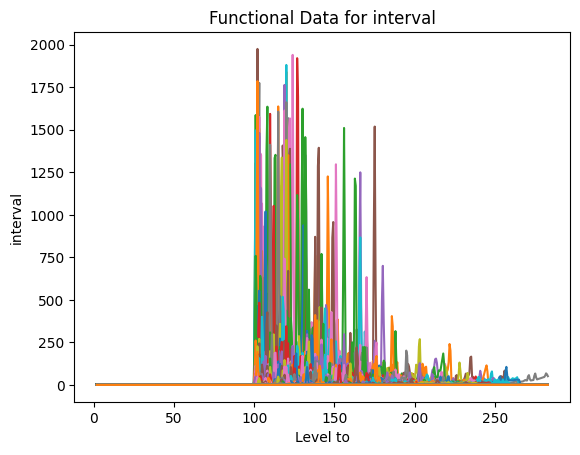

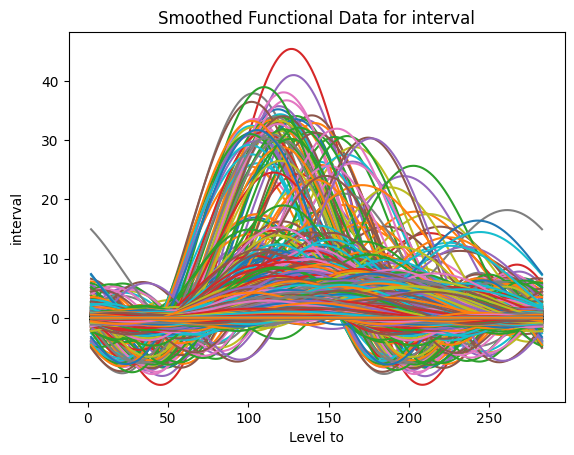

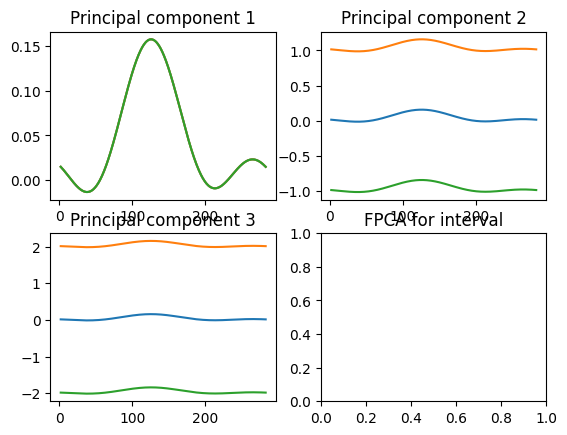

c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


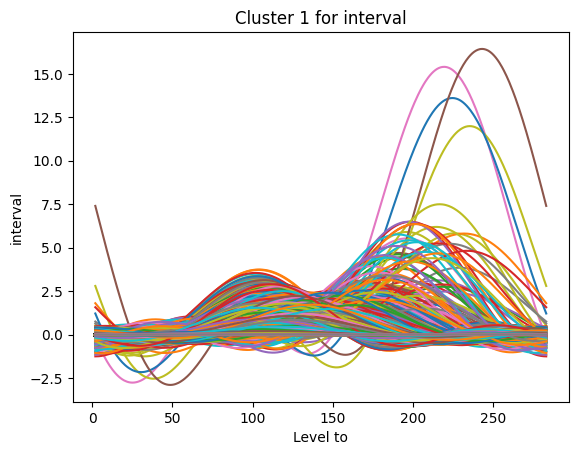

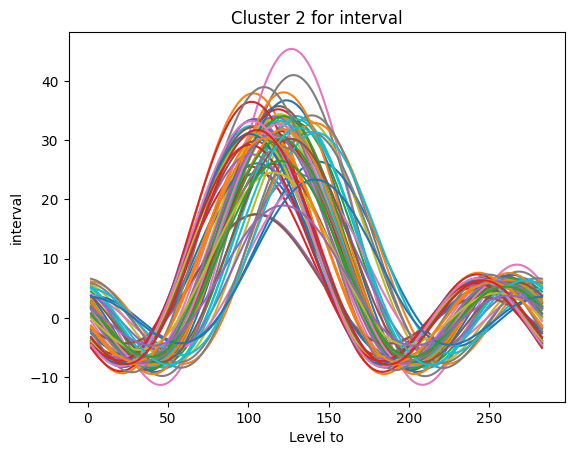

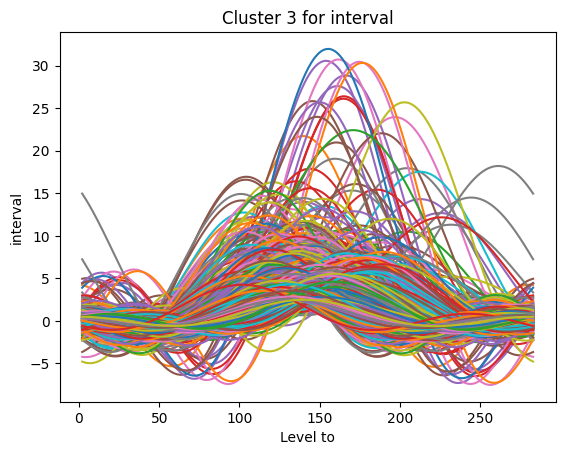

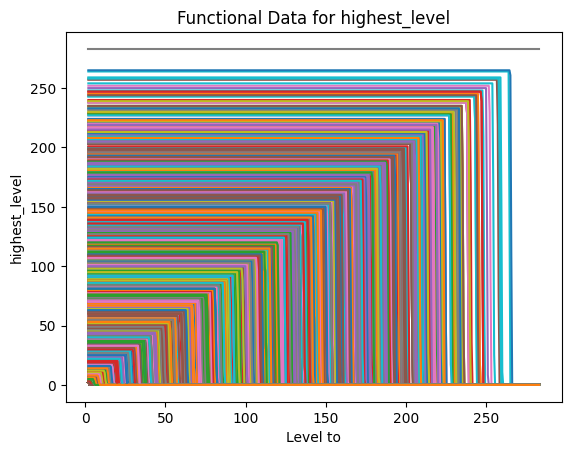

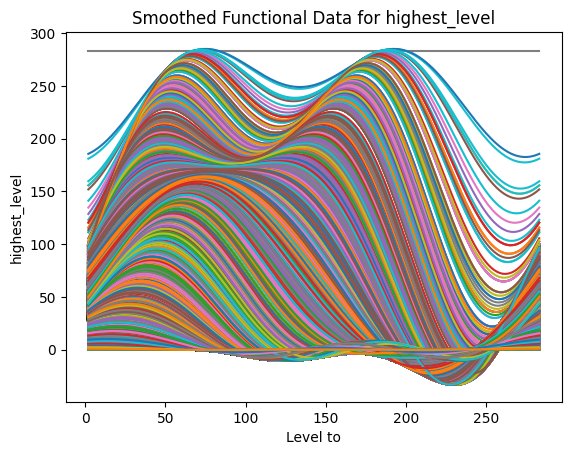

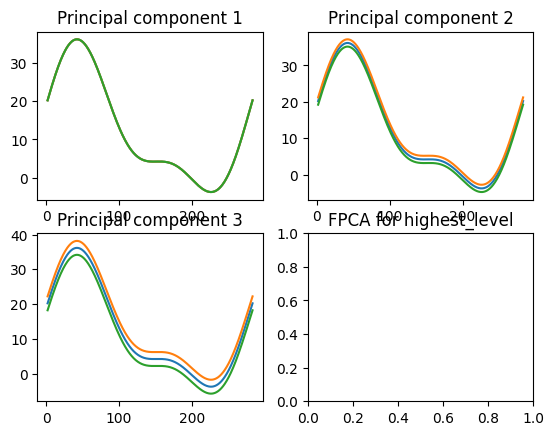

c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


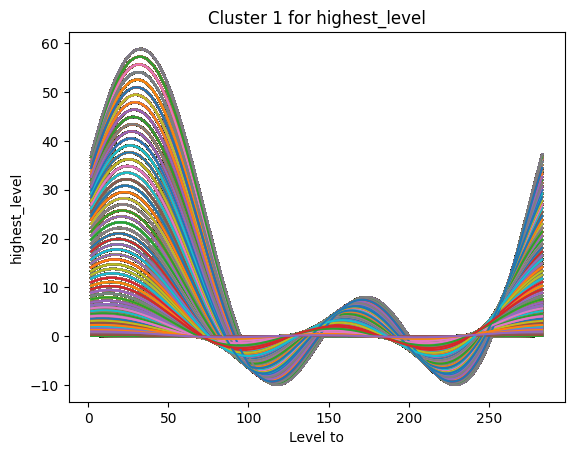

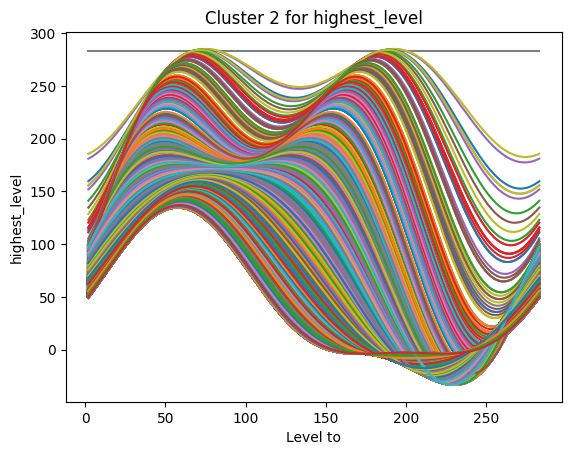

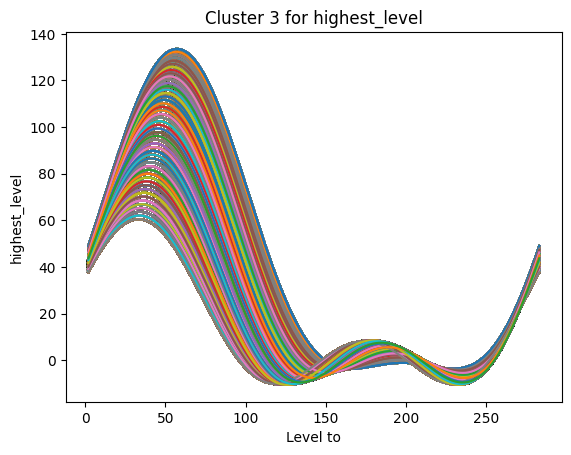

KeyboardInterrupt: 

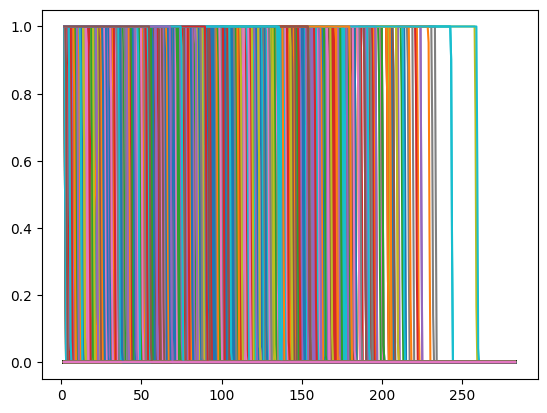

In [ ]:
for col, fd in fd_list.items():
    # Step 4: 기능 데이터 시각화
    fd.plot()
    plt.title(f'Functional Data for {col}')
    plt.xlabel('Level to')
    plt.ylabel(col)
    plt.show()

    # Step 5: 데이터 평활화
    basis = FourierBasis(domain_range=(min(time_points), max(time_points)), n_basis=5)
    smoother = BasisSmoother(basis)
    fd_smooth = smoother.fit_transform(fd)

    # 평활화된 데이터 시각화
    fd_smooth.plot()
    plt.title(f'Smoothed Functional Data for {col}')
    plt.xlabel('Level to')
    plt.ylabel(col)
    plt.show()

    # Step 6: PCA 수행
    fpca = FPCA(n_components=3)
    fpca.fit(fd_smooth)
    scores = fpca.transform(fd_smooth)

    # PCA 결과 시각화
    FPCAPlot(fd_smooth, components=[0, 1, 2]).plot()
    plt.title(f'FPCA for {col}')
    plt.show()

    # K-means 클러스터링을 수행합니다.
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(scores)

    # 클러스터 할당
    labels = kmeans.labels_

    # Step 7: 클러스터 시각화 및 해석
    for cluster in np.unique(labels):
        cluster_fd = fd_smooth[labels == cluster]
        cluster_fd.plot()
        plt.title(f'Cluster {cluster + 1} for {col}')
        plt.xlabel('Level to')
        plt.ylabel(col)
        plt.show()
